# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝 
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    * 딥러닝
        * 모델 구조를 2가지 이상을 생성하고 모델링을 수행합니다.
        * epochs, learning_rate 등을 조절하며 성능을 튜닝합니다.
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.
        * 성능 가이드
            * MAE : 4 ~ 6
            * MAPE : 0.09~0.14

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

!pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

### (3) 데이터 불러오기
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl

In [42]:
file1 = 'data2.pkl'
# file1 = 'data2_YS.pkl'

In [47]:
df = joblib.load(file1)

## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

### (1) NA 조치

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2921 entries, 0 to 2920
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2921 non-null   datetime64[ns]
 1   car_cnt           2921 non-null   int64         
 2   request_cnt       2921 non-null   int64         
 3   ride_cnt          2921 non-null   int64         
 4   waiting_time      2921 non-null   float64       
 5   fare              2921 non-null   int64         
 6   distance          2921 non-null   int64         
 7   weekday           2921 non-null   category      
 8   month             2921 non-null   category      
 9   week              2921 non-null   category      
 10  year              2921 non-null   category      
 11  target            2921 non-null   float64       
 12  temp_max          2921 non-null   float64       
 13  temp_min          2921 non-null   float64       
 14  rain(mm)          2921 n

### (2) 가변수화

In [49]:
dumm_cols = ['weekday', 'month', 'year']
df = pd.get_dummies(df, columns=dumm_cols, drop_first=True)

#### 1) x, y 나누기

In [50]:
df.loc[df['Date'] == '2022-10',:].index

Int64Index([2830], dtype='int64')

In [51]:
test_start = 2830

In [52]:
removed_cols = ['Date', 'week', 'is_holiday']
# removed_cols = ['Date', 'week', 'season', 'holiday_yn']
x = df.drop(removed_cols, axis=1)
y = df.loc[:, 'target']

#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False) 

In [53]:
from sklearn.model_selection import train_test_split
x_train = x.iloc[:test_start,:]
x_test = x.iloc[test_start:,:]
y_train = y[:test_start]
y_test = y[test_start:]
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2830, 40), (91, 40), (2830,), (91,))

In [54]:
# from sklearn.model_selection import train_test_split
# x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=1)
# x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

In [55]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830 entries, 0 to 2829
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_cnt           2830 non-null   int64  
 1   request_cnt       2830 non-null   int64  
 2   ride_cnt          2830 non-null   int64  
 3   waiting_time      2830 non-null   float64
 4   fare              2830 non-null   int64  
 5   distance          2830 non-null   int64  
 6   target            2830 non-null   float64
 7   temp_max          2830 non-null   float64
 8   temp_min          2830 non-null   float64
 9   rain(mm)          2830 non-null   float64
 10  humidity_max(%)   2830 non-null   float64
 11  humidity_min(%)   2830 non-null   float64
 12  sunshine(MJ/m2)   2830 non-null   float64
 13  ave_waiting_time  2830 non-null   float64
 14  ride_rate         2830 non-null   float64
 15  weekday_1         2830 non-null   uint8  
 16  weekday_2         2830 non-null   uint8  


### (4) Scaling
* KNN, SVM 알고리즘 및 DL을 적용하기 위해서는 스케일링을 해야 합니다.

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 딥러닝 모델 구조 2가지 이상을 설계하고 모델을 생성합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

In [57]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [65]:
def modeling(model, x_train=x_train, x_test=x_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MAE: {round(mae,3)}")
    print(f"MAPE: {round(mape,3)}%")
    print(f"r2: {r2}")
    
    # 예측값, 실젯값 시각화
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.legend()
    plt.title('Waiting Time')
    plt.show()

### (1) 머신러닝

#### 1) 모델1

MAE: 5.183
MAPE: 0.127%
r2: -0.25249531293844774


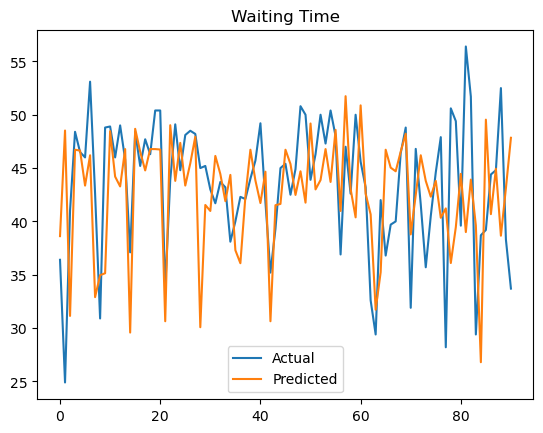

In [66]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
# modeling(model, x_train_s, x_test_s)
modeling(model)

#### 2) 모델2

MAE: 0.008
MAPE: 0.0%
r2: 0.9999949281510018


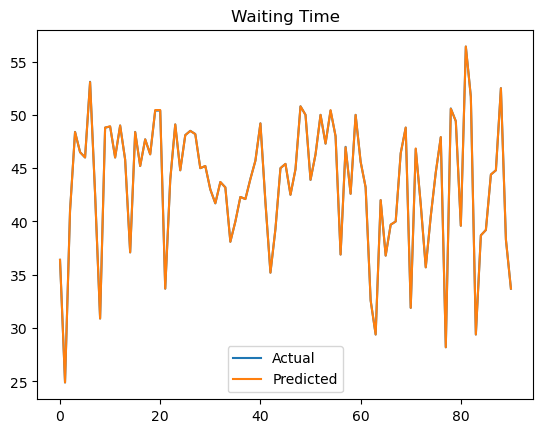

In [67]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
modeling(model)

#### 3) 모델3

MAE: 0.061
MAPE: 0.001%
r2: 1.0


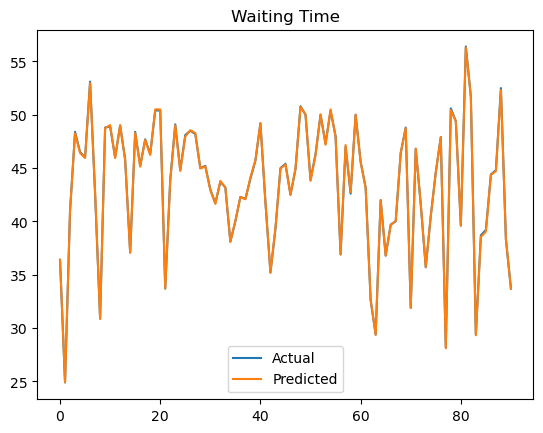

In [61]:
from lightgbm import LGBMRegressor
model = LGBMRegressor(random_state=1, verbose=-100)
modeling(model)

#### 4) 모델4

MAE: 0.078
MAPE: 0.002%
r2: 1.0


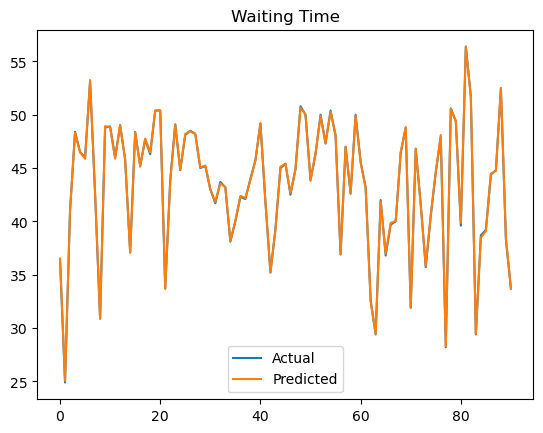

In [62]:
from xgboost import XGBRegressor
model = XGBRegressor(random_state=1)
modeling(model)

### (2) 딥러닝

In [19]:
!pip install tensorflow

In [20]:
import tensorflow as tf

#### 1) 모델1

In [78]:
x_train.shape

(2830, 40)

In [106]:
import numpy as np
import tensorflow as tf

np.random.seed(0)
tf.random.set_seed(0)

X = tf.keras.Input(shape=[x_train.shape[1]])

H = tf.keras.layers.Dense(64)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dropout(0.6)(H)
H = tf.keras.layers.Dense(64)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dropout(0.5)(H)
H = tf.keras.layers.Dense(16)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dropout(0.5)(H)
H = tf.keras.layers.Dense(8)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dropout(0.3)(H)
Y = tf.keras.layers.Dense(1)(H)

model1 = tf.keras.Model(X, Y)
model1.compile(loss='mae')
# model1.summary()

In [107]:
model1.fit(x_train, y_train, epochs=500, batch_size=128, 
          validation_split=0.2, verbose=0)
model1.fit(x_train, y_train, epochs=10,  batch_size=128, validation_split=0.2)

Epoch 1/10
18/18 [==============================] - 0s 24ms/step - loss: 7.6224 - val_loss: 3.4044
Epoch 2/10
18/18 [==============================] - 0s 14ms/step - loss: 7.8701 - val_loss: 1.7842
Epoch 3/10
18/18 [==============================] - 0s 14ms/step - loss: 7.7151 - val_loss: 3.9252
Epoch 4/10
18/18 [==============================] - 0s 14ms/step - loss: 7.8517 - val_loss: 5.0179
Epoch 5/10
18/18 [==============================] - 0s 14ms/step - loss: 7.6500 - val_loss: 6.4545
Epoch 6/10
18/18 [==============================] - 0s 14ms/step - loss: 7.7519 - val_loss: 5.8640
Epoch 7/10
18/18 [==============================] - 0s 15ms/step - loss: 7.7134 - val_loss: 3.7621
Epoch 8/10
18/18 [==============================] - 0s 15ms/step - loss: 7.7468 - val_loss: 1.1942
Epoch 9/10
18/18 [==============================] - 0s 14ms/step - loss: 7.7320 - val_loss: 1.3520
Epoch 10/10
18/18 [==============================] - 0s 14ms/step - loss: 7.4656 - val_loss: 5.6118


In [108]:
model1.evaluate(x_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 5.9912


5.991199016571045

#### 2) 모델2

In [84]:
X = tf.keras.Input(shape=x_train.shape[1])
H = tf.keras.layers.Flatten()(X)

H = tf.keras.layers.Dense(64)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

for i in range(16):
    H1 = tf.keras.layers.Dense(64)(H)
    H1 = tf.keras.layers.BatchNormalization()(H1)
    H1 = tf.keras.layers.Activation('swish')(H1)
    H = tf.keras.layers.Add()([H, H1])

Y = tf.keras.layers.Dense(1)(H)
model2 = tf.keras.Model(X, Y)
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='mae')
# model.summary()

In [85]:
early = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
result = model2.fit(x_train, y_train, epochs=10000000, batch_size=128,
                   validation_split=0.2, # validation_data=(x_val, y_val)
                   callbacks=[early]
)

Epoch 1/10000000
18/18 [==============================] - 19s 109ms/step - loss: 37.9376 - val_loss: 2661.1548
Epoch 2/10000000
18/18 [==============================] - 1s 29ms/step - loss: 28.8312 - val_loss: 1356.2491
Epoch 3/10000000
18/18 [==============================] - 1s 30ms/step - loss: 21.4198 - val_loss: 440.8331
Epoch 4/10000000
18/18 [==============================] - 1s 29ms/step - loss: 14.9106 - val_loss: 45.7589
Epoch 5/10000000
18/18 [==============================] - 1s 31ms/step - loss: 9.9412 - val_loss: 8.7630
Epoch 6/10000000
18/18 [==============================] - 0s 27ms/step - loss: 6.8274 - val_loss: 40.6213
Epoch 7/10000000
18/18 [==============================] - 0s 27ms/step - loss: 5.6693 - val_loss: 14.7605
Epoch 8/10000000
18/18 [==============================] - 1s 31ms/step - loss: 5.1783 - val_loss: 7.6881
Epoch 9/10000000
18/18 [==============================] - 0s 28ms/step - loss: 3.9367 - val_loss: 10.2488
Epoch 10/10000000
18/18 [============

In [86]:
model2.evaluate(x_test, y_test)

3/3 [==============================] - 0s 7ms/step - loss: 3.8211


3.821126699447632

## 4.모델 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.

3/3 [==============================] - 0s 6ms/step


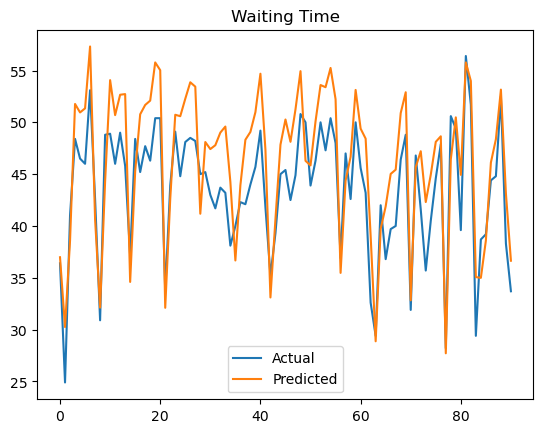

MAE : 3.821


In [109]:
final_model = model

y_pred = final_model.predict(x_test)
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Waiting Time')
plt.show()

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE : {round(mae,3)}')